<p style="text-align:center"> 
    <a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/" target="_blank"> 
    <img src="../assets/logo.png" width="200" alt="Flavio Aguirre Logo"> 
    </a>
</p>

<h1 align="center"><font size="7"><strong>📉 ByeBye Predictor</strong></font></h1>
<br>
<hr>

## ``E``xploratory ``D``ata ``A``nalysis

Once we have our raw datasets, the first thing we'll do is explore them. We're not transforming anything here yet; we're just observing and understanding what they contain and why.



### EDA Objectives:
We shouldn't discover anything out of this world. By following a clear objective, we can already obtain interesting information. Once this is understood, we can eventually contribute our own work. We just have to pay attention...


**Key Questions**
* What variables are there?

* What types of data are there?

* Are there missing values?

* Are there outliers (extreme values)?

* How are the variables distributed?

* Are there interesting relationships between variables?

In [1]:
# We imported library 
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns


# warning ignore
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Visual style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

<hr>

### What variables are there?

As in any exploratory analysis, the first thing we'll do is find out the names of all the labels in our raw dataset, as well as its size. We'll also need to observe the type of data it contains to understand what we're dealing with.

>Note: We could also use the pandas ``.info()`` method to observe precisely this basic information of the dataset, but it is done this way to show the handling of my criterion step by step.

In [3]:
# Load the dataset
df_telco = pd.read_csv('../data/raw/telco-customer-churn.csv')
print("\nDataset loaded successfully.\n")

# Display the shape of the dataset
print(f"Dataset shape: {df_telco.shape}. \n")

# Display the data types of each column
print("Name of each column and what type of data it is:")
print(df_telco.dtypes)


Dataset loaded successfully.

Dataset shape: (7043, 21). 

Name of each column and what type of data it is:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


***We observe that:***

* We have 21 tags in total, where our ``target variable`` will clearly be ``churn``.
* There are only 3 numeric variables; the rest are of type object (contain strings).

In [4]:
# We corroborate by separating each column with its data type
categorical_columns = df_telco.select_dtypes(include=['object']).columns
numerical_columns = df_telco.select_dtypes(include=[np.number]).columns

print("\nData types within the daset:\n")

print("Categorical columns:")
print(categorical_columns.tolist())
print("Total number of categorical columns:", len(categorical_columns))

print("\nNumerical columns:")
print(numerical_columns.tolist())
print("Total number of numerical columns:", len(numerical_columns))

# Detect numerically encoded binary
numeric_binary = [col for col in numerical_columns if df_telco[col].nunique() == 2]
continuous_numeric = [col for col in numerical_columns if col not in numeric_binary]

print("\nNumerically encoded binary columns:")
print(numeric_binary)
print("Total number of numerically encoded binary columns:", len(numeric_binary))
print("\nContinuous numeric columns:")
print(continuous_numeric)
print("Total number of numerically continuous columns:", len(continuous_numeric))


Data types within the daset:

Categorical columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Total number of categorical columns: 18

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']
Total number of numerical columns: 3

Numerically encoded binary columns:
['SeniorCitizen']
Total number of numerically encoded binary columns: 1

Continuous numeric columns:
['tenure', 'MonthlyCharges']
Total number of numerically continuous columns: 2


<br>

### Missing values


In [5]:
print("\nMissing values in each column:")
print(df_telco.isnull().sum().sort_values(ascending=False))


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


We see that there are no missing values ​​for any of the 21 columns of the data frame.

<br>

### How are variables distributed?

Understanding data distribution allows us to understand the general behavior of variables and better understand their content. We can detect potential anomalies, identify biases, and spot patterns or outliers.

Despite being a categorical variable, ``"TotalCharge"`` refers to numerical values. We note that this variable is important for the analysis, so we format it without changing anything other than the data type. We will also discard ``"SeniorCitizen"`` because it is a categorical variable coded as numerical (0: No, 1: Yes), so:

* It does not represent a continuous magnitude like seniority or monthly charges.

* It does not make sense to use it in a continuous evaluation matrix because its scale is discrete and binary.

In contrast, ``"TotalCharges"`` is a truly numerical variable, and its analysis provides much more context for understanding the relationship between length of time as a customer, monthly charges, and total billed.

In [6]:
# Convert 'TotalCharges' to numeric type (replacing errors with NaN)
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')
print(f"\n'TotalCharges' was successfully converted to type: {df_telco['TotalCharges'].dtypes}\n")

# Select numeric columns, excluding 'SeniorCitizen'
numerical_columns = df_telco.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'SeniorCitizen']

print("Numeric columns updated (without 'SeniorCitizen'):")
print(numerical_columns)


'TotalCharges' was successfully converted to type: float64

Numeric columns updated (without 'SeniorCitizen'):
['tenure', 'MonthlyCharges', 'TotalCharges']


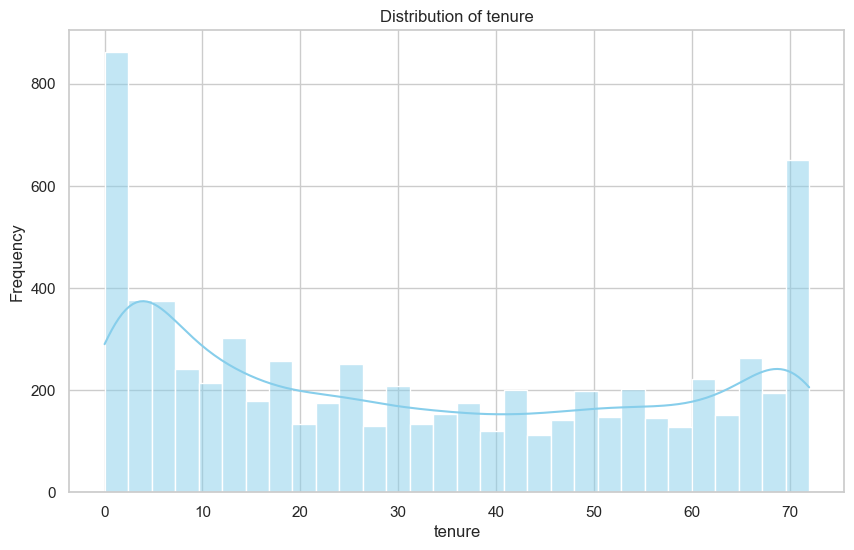

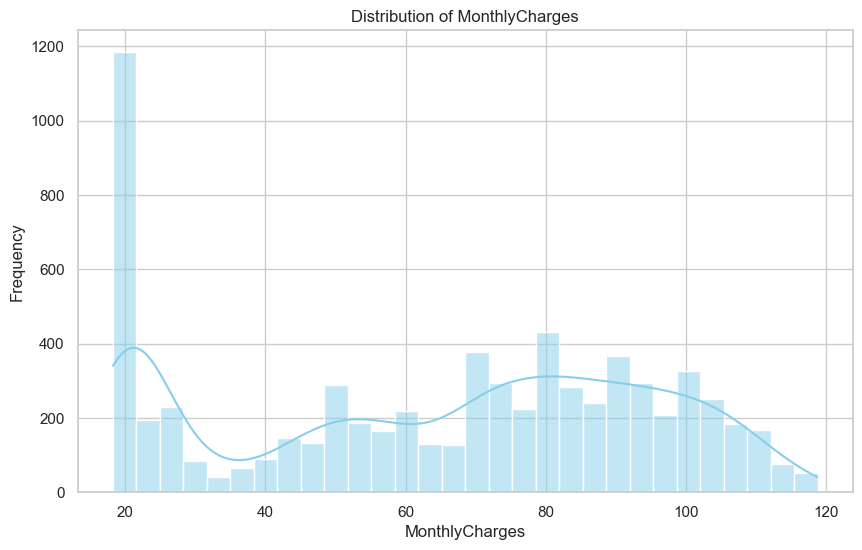

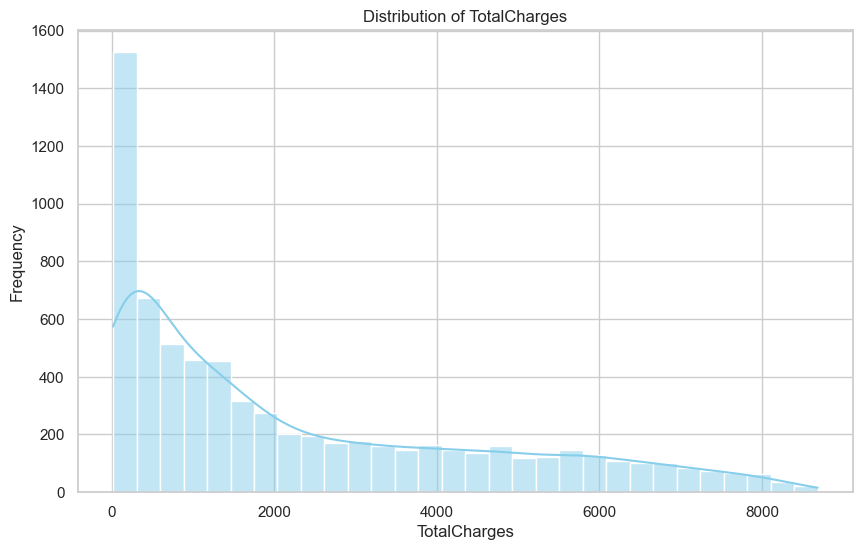

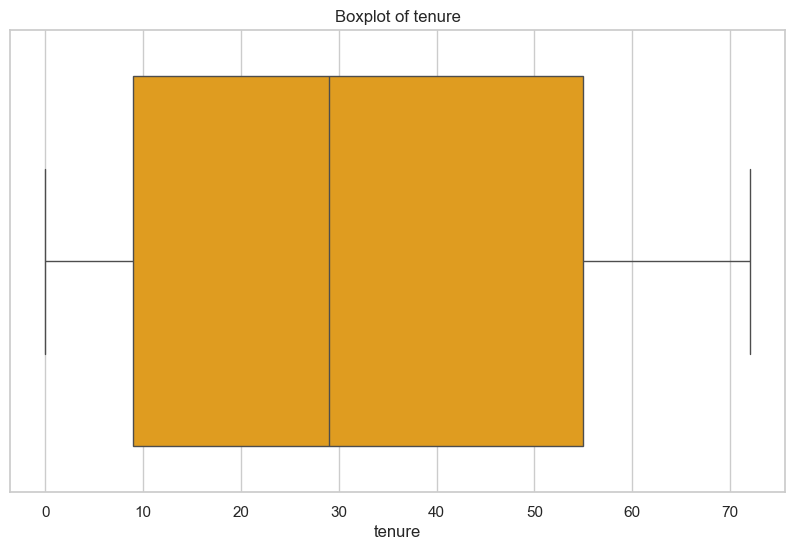

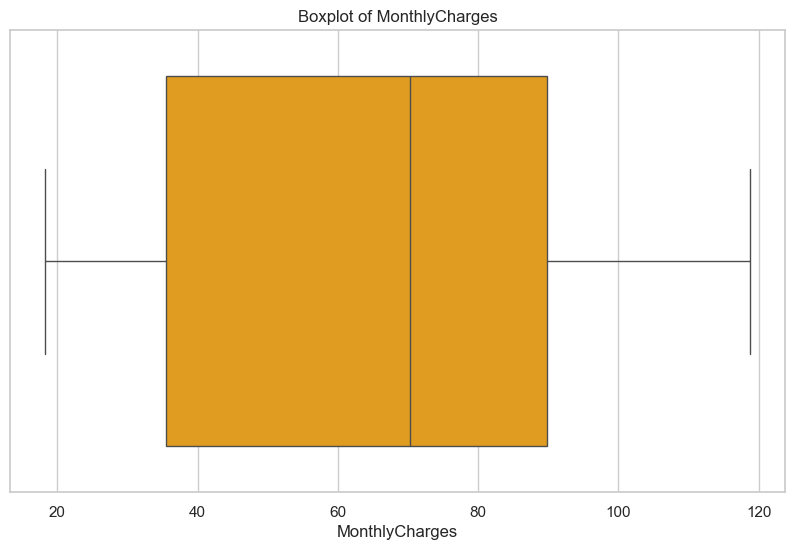

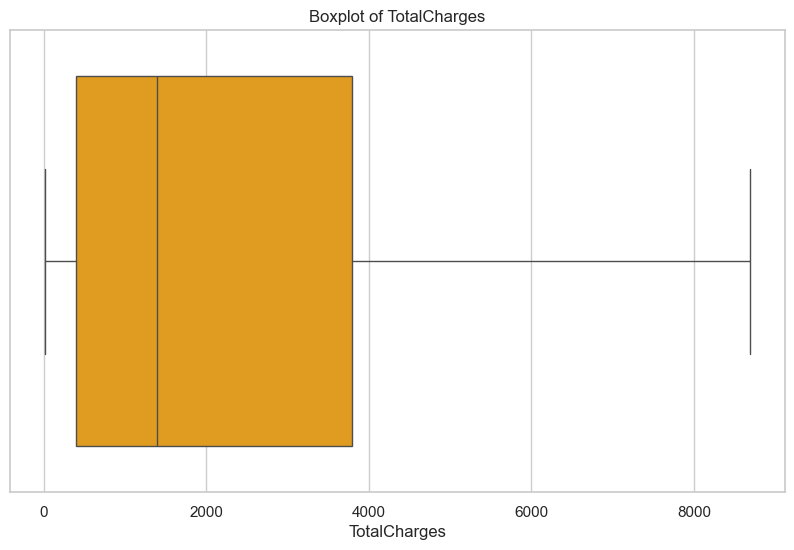

In [13]:
# Distribution of Numeric Variables
for col in numerical_columns:
    sns.histplot(df_telco[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'../reports/figures/eda/distribution_{col}.png')
    plt.show()

# Boxplots to View Outliers
for col in numerical_columns:
    sns.boxplot(x=df_telco[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.savefig(f'../reports/figures/eda/boxplot_{col}.png')
    plt.show()

We apply a descriptive statistical analysis again

In [8]:
# Basic Statistical Description
print("\nSummary Statistics for Numeric Variables:")
print(df_telco[numerical_columns].describe())

# Skewness and Kurtosis: Understanding the Shape of the Distribution
print("\nSkewness:")
print(df_telco[numerical_columns].skew().sort_values(ascending=False))

print("\nKurtosis:")
print(df_telco[numerical_columns].kurtosis().sort_values(ascending=False))


Summary Statistics for Numeric Variables:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

Skewness:
TotalCharges      0.961642
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

Kurtosis:
TotalCharges     -0.231799
MonthlyCharges   -1.257260
tenure           -1.387372
dtype: float64


Similarly, to observe the distribution of categorical variables, we will omit ``"CustomerID"`` since, as we can see, ``"CustomerID"`` refers to the user ID and does not provide relevant information for this analysis.

In [9]:
# Filter categorical columns, excluding unwanted ones
cols_exclude = ['customerID', 'TotalCharges']
print(f"\nExcluding columns: {cols_exclude}")
categorical_columns = [col for col in categorical_columns if col not in cols_exclude]


Excluding columns: ['customerID', 'TotalCharges']


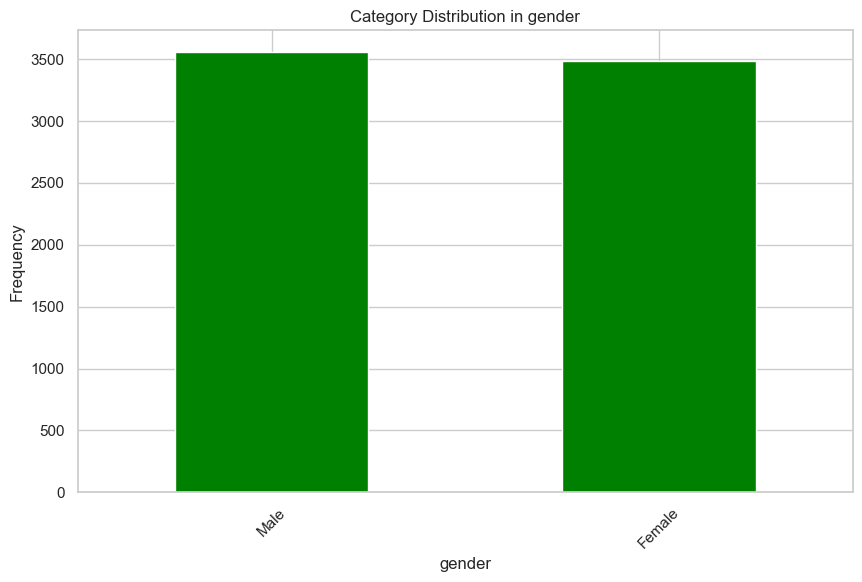

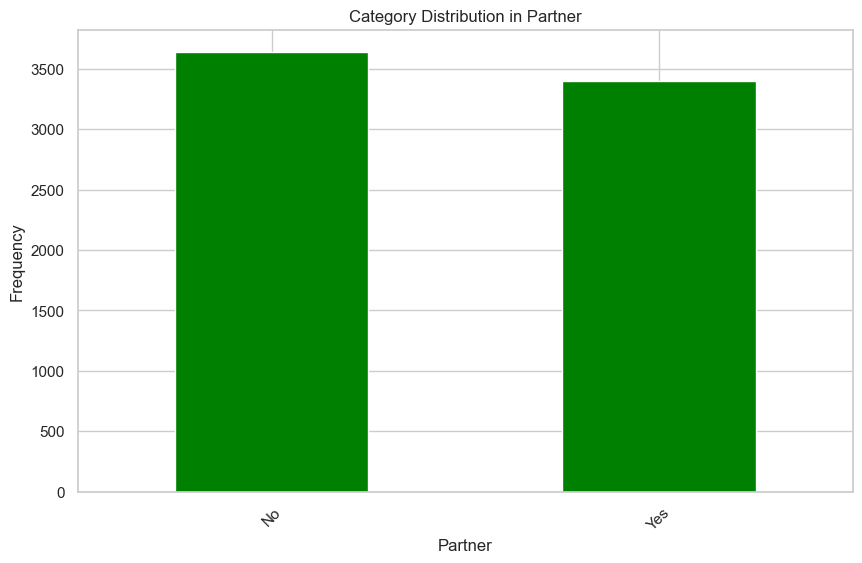

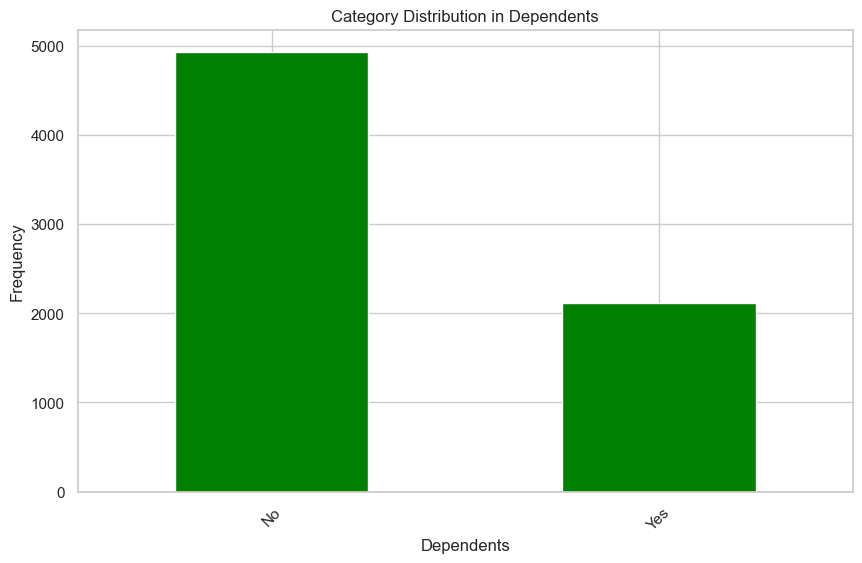

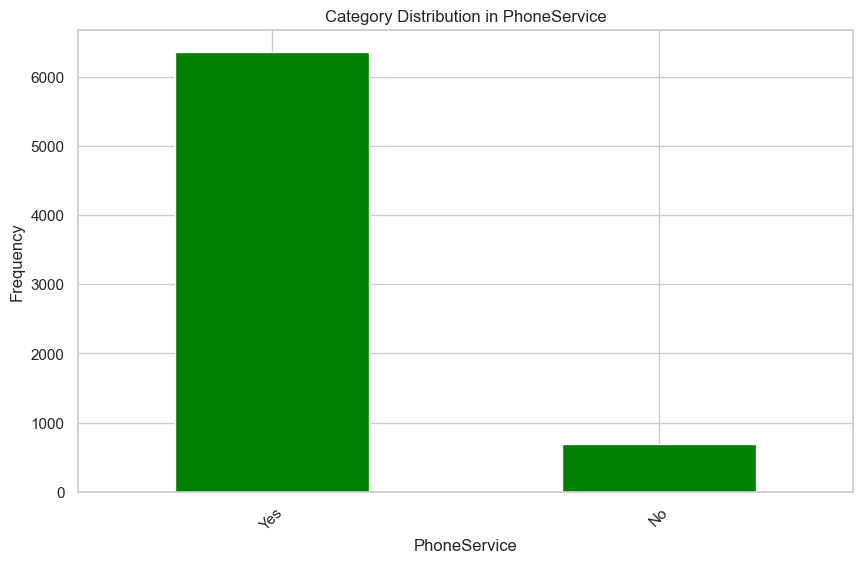

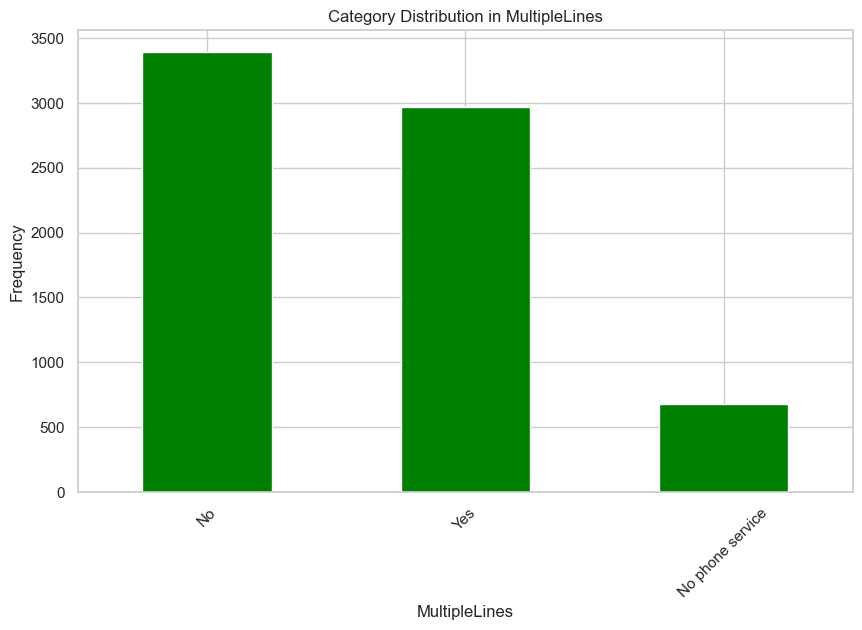

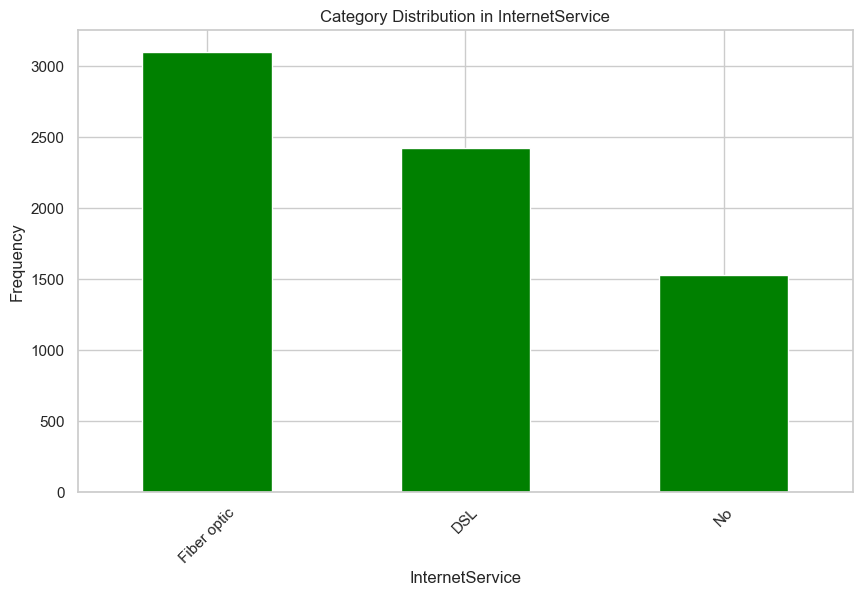

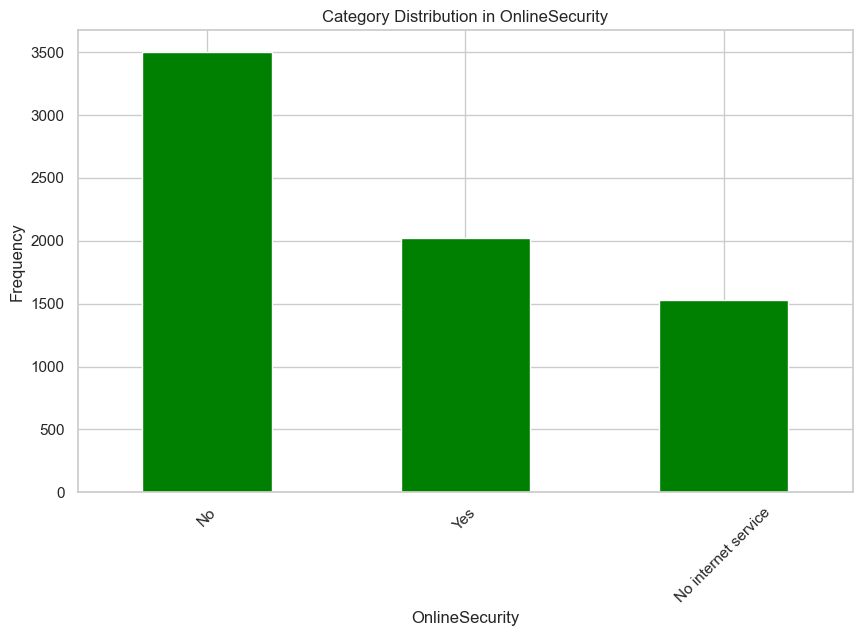

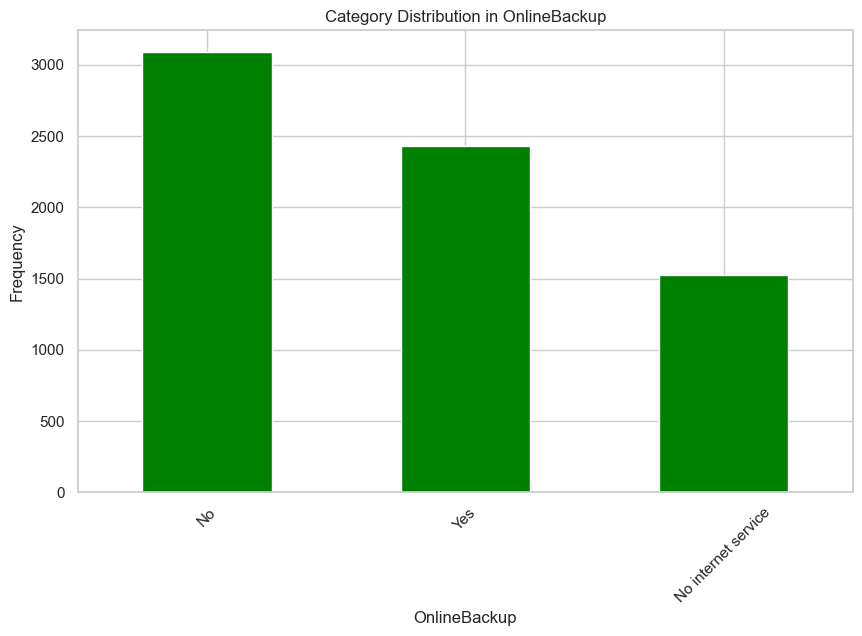

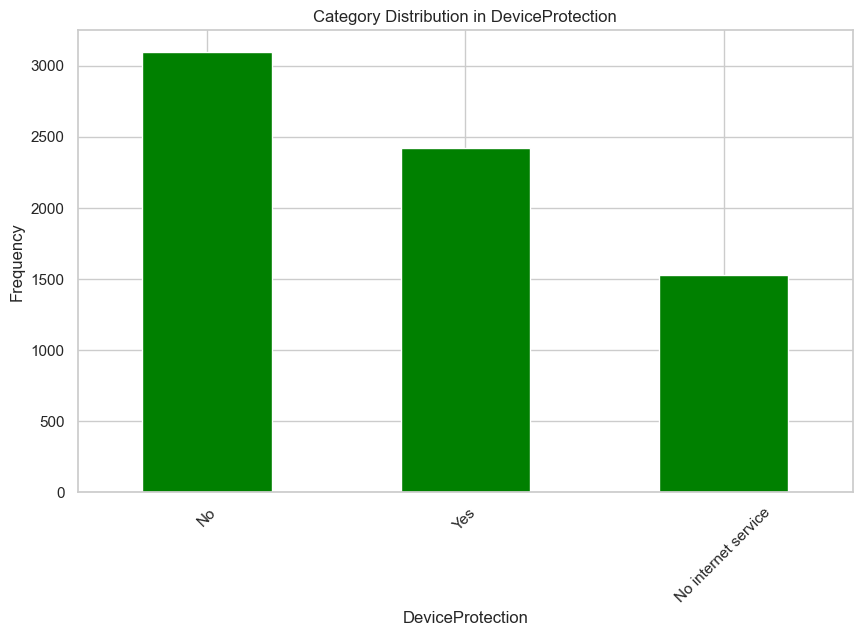

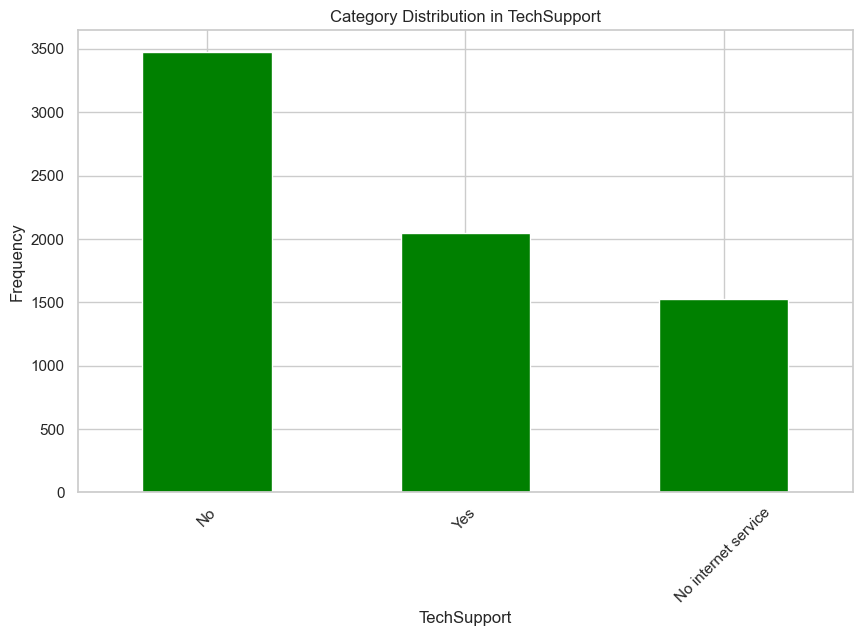

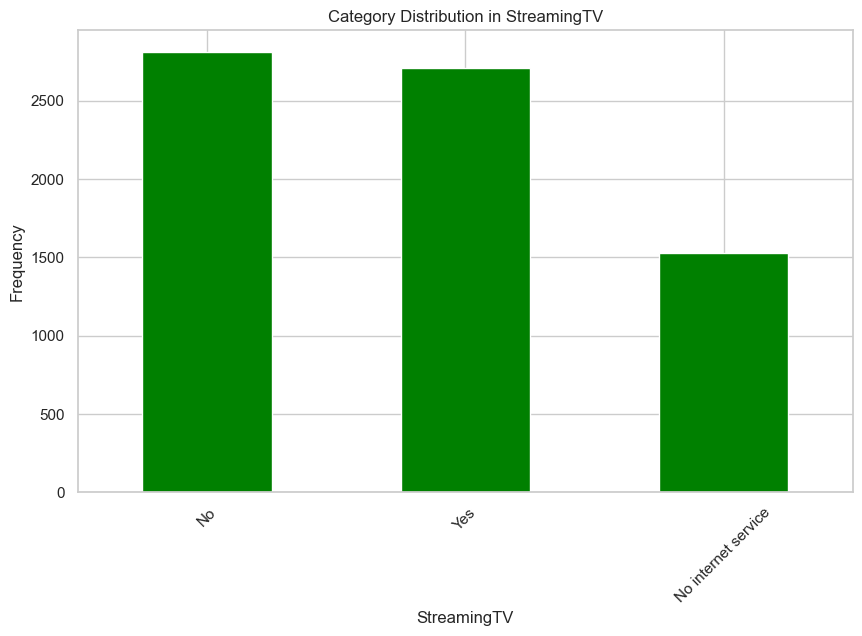

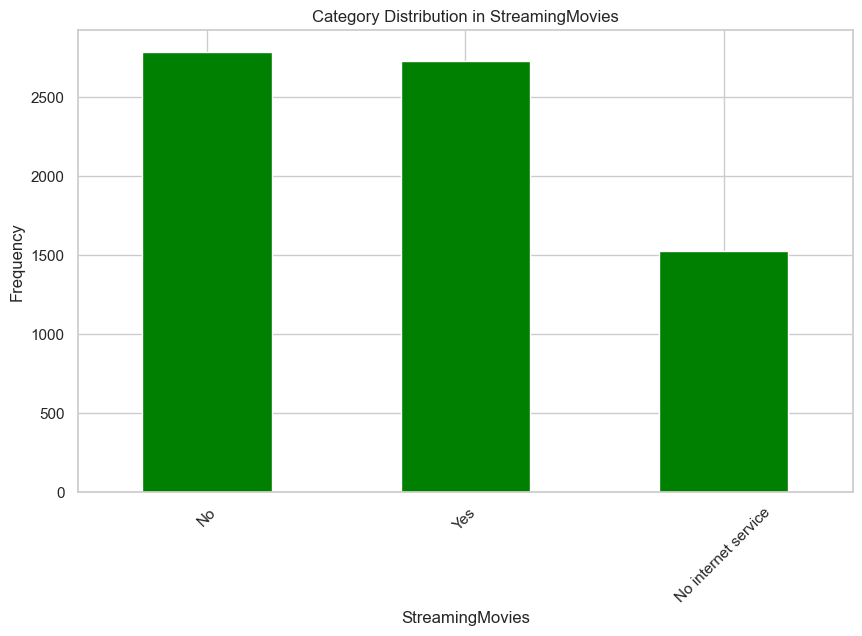

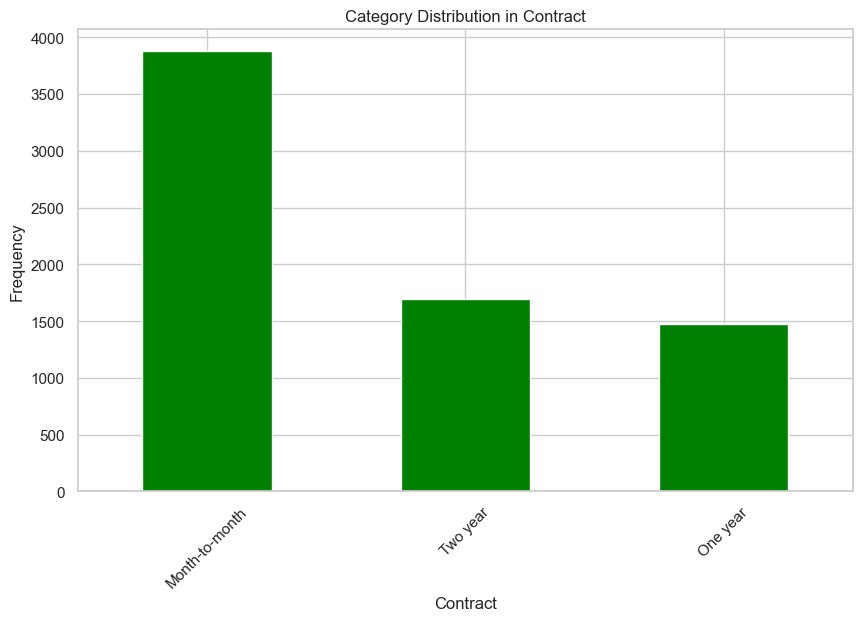

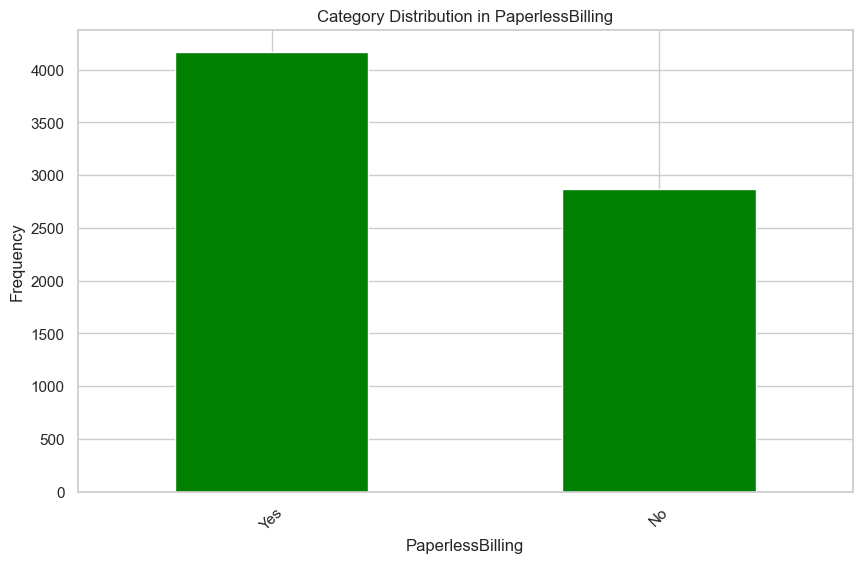

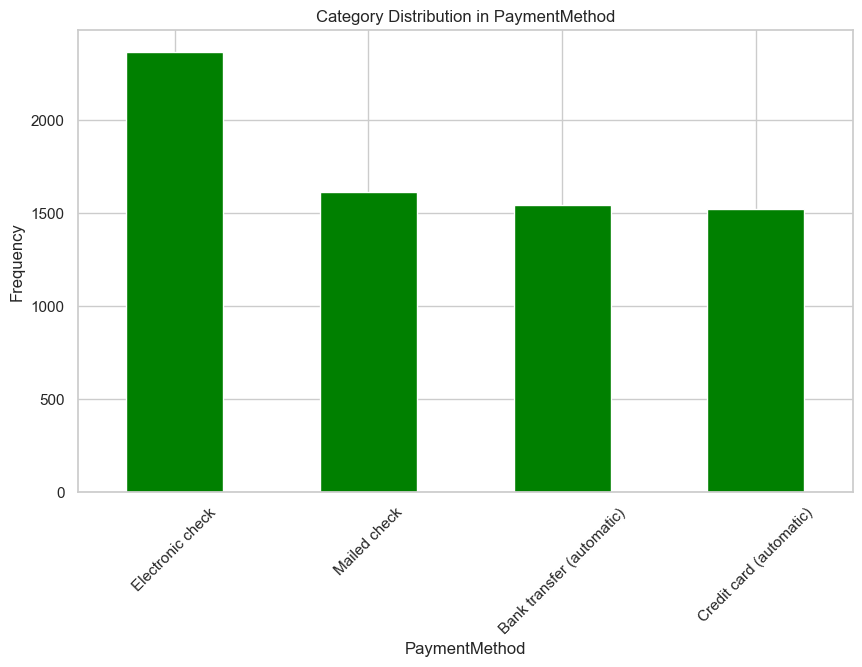

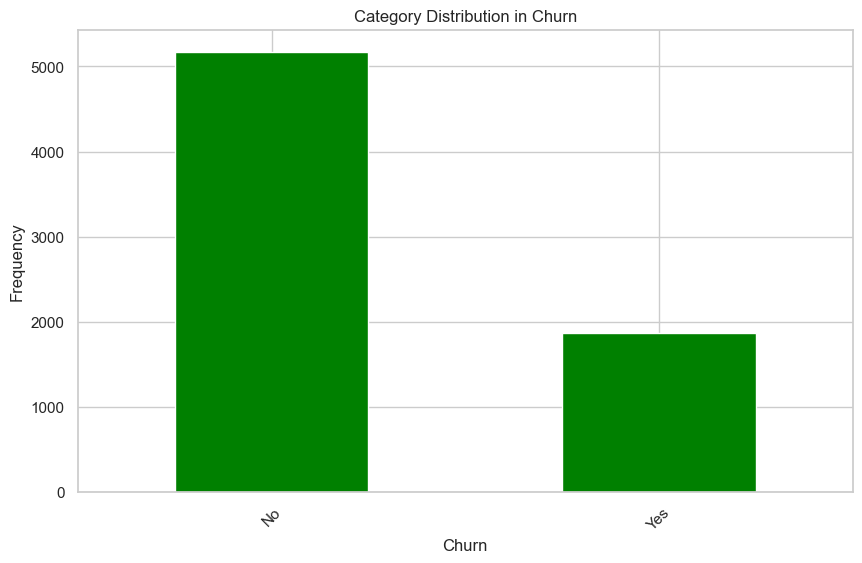

In [ ]:
# Category Counting for Categorical Variables
for col in categorical_columns:
    df_telco[col].value_counts().plot(kind='bar', palette='Set2')
    plt.title(f'Category Distribution in {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.savefig(f'../reports/figures/eda/category_distribution_{col}.png')
    plt.show()

We're already getting a sense of what we're dealing with. The predominant presence of categorical variables with few levels facilitates future coding for modeling (e.g., using ``One-Hot Encoding`` or ``Label Encoding``), and also suggests that most decisions or service features are structured around simple or limited options, which is consistent with data from surveys or contract forms.

<br>

### Are there outliers (extreme values)?

To detect outliers, we must analyze whether there are data outside the interquartile range of the data set. Therefore, we must remember that this part of the analysis can only be performed with numerical variables. Therefore, as we have seen, it only applies to three columns (SeniorCitizen, Tenure, MonthlyCharges).
We have also seen that, according to the box plot for SeniorCitizen, it has outliers. We verify this as follows:

In [14]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    return outliers

outliers_summary = {col: detect_outliers_iqr(df_telco[numerical_columns], col).shape[0] 
                    for col in df_telco[numerical_columns].select_dtypes(include='number')}

print("\nOutliers detected in numerical columns:")
for col, count in outliers_summary.items():
    print(f"{col}: {count} outliers")


Outliers detected in numerical columns:
tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


As we saw in the box plots, there are no outliers in the numerical columns.

<br>

### Are there interesting relationships between variables?

We must understand that the type of relationship we are looking for depends on the type of variables:

* ``Among numerical variables``, we look for linear or nonlinear relationships that can be measured through correlations or dispersion visualizations.

* ``Among categorical variables``, we look for associations that indicate whether the values ​​of one variable influence or are distributed differently according to another.

* ``Among numerical and categorical variables``, we seek to understand how numerical values ​​behave across categories, through comparisons of means, medians, and distributions.

***Relationships between numerical variables***

Let's first look at the relationship between the variables without the objective.

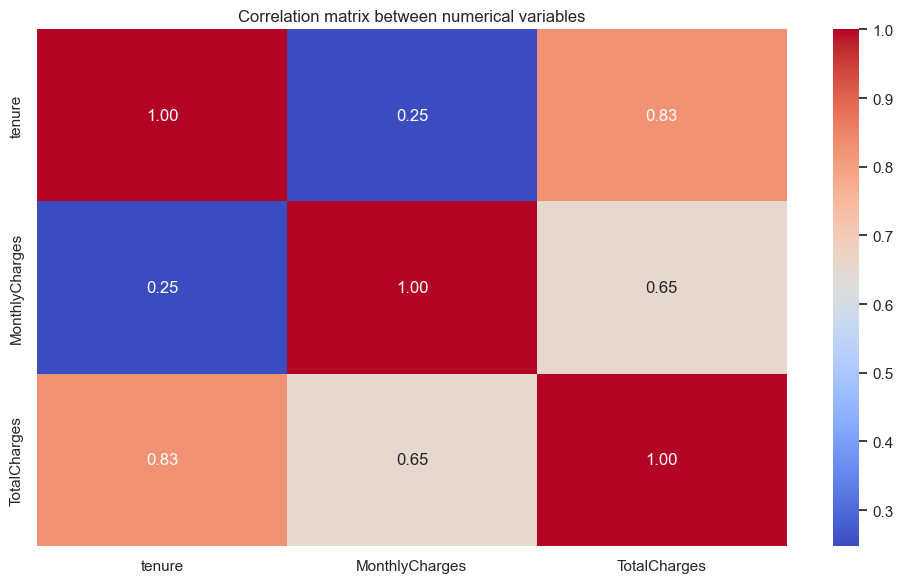

In [15]:
corr = df_telco[numerical_columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix between numerical variables')
plt.savefig('../reports/figures/eda/correlation_matrix.png')
plt.tight_layout()
plt.show()

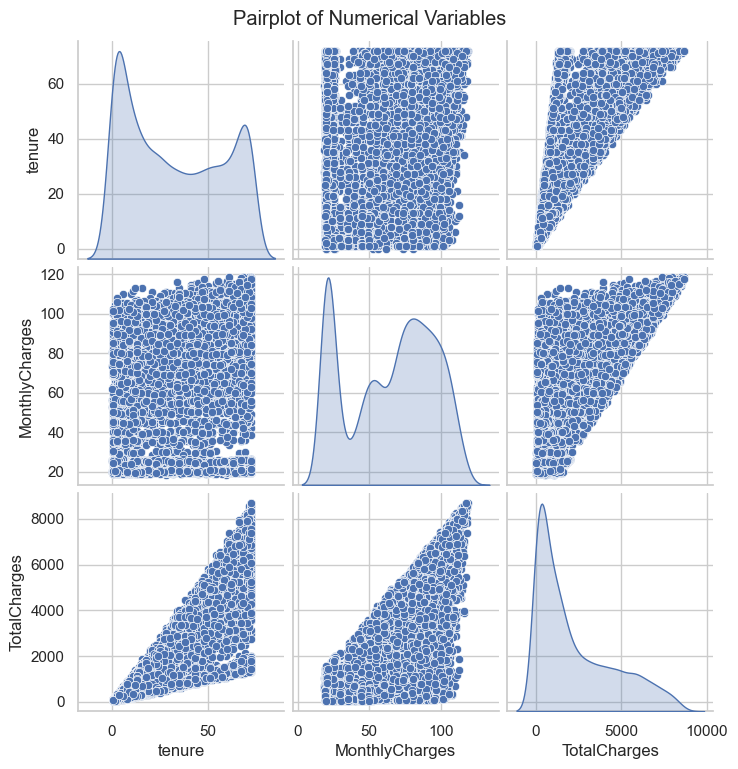

In [16]:
sns.pairplot(df_telco[numerical_columns], diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.savefig('../reports/figures/eda/pairplot_numerical_variables.png')
plt.show()

***Initial Analysis of Numerical Variables***

During the exploratory analysis, we identified that of the three numerically relevant columns (``tenure``, ``MonthlyCharges``, ``TotalCharges``), the ``TotalCharges`` variable initially appears as an object type due to empty or poorly formatted values. After properly converting it to a numeric type, we observed the following using scatter plots (pairplots) and a correlation matrix (heatmap):

* ``Tenure`` and ``TotalCharges`` exhibit a high positive correlation, which makes sense, since customers with a longer tenure with the company accumulate higher total charges.

* ``MonthlyCharges`` shows a weak correlation with ``Tenure`` and ``TotalCharges``, indicating that the monthly amount does not strictly depend on the length of tenure or the total accumulated charge.

**This initial analysis suggests that Tenure and TotalCharges are strongly correlated, while MonthlyCharges could provide relevant information when combined with categorical variables such as contract type or services purchased.**

***Analysis of the numerical variables around the objective, ``churn``***

We format the objective variable so we can analyze it alongside the numerical categories.


In [17]:
# Convert 'Churn' to binary values: 'Yes' → 1, 'No' → 0
print(f"\nInitial format: {df_telco['Churn'].dtypes}")
df_telco['Churn'] = df_telco['Churn'].map({'Yes': 1, 'No': 0})
print("\n'Churn' successfully converted to numeric (0 = No, 1 = Yes)")
print(f"'Churn' final data type: {df_telco['Churn'].dtypes}")


Initial format: object

'Churn' successfully converted to numeric (0 = No, 1 = Yes)
'Churn' final data type: int64


We add ``"Churn"`` to our ``"numerical_columns"`` list.

In [18]:
numerical_columns.append('Churn')
print(f"\nNumerical columns update: {numerical_columns}")


Numerical columns update: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


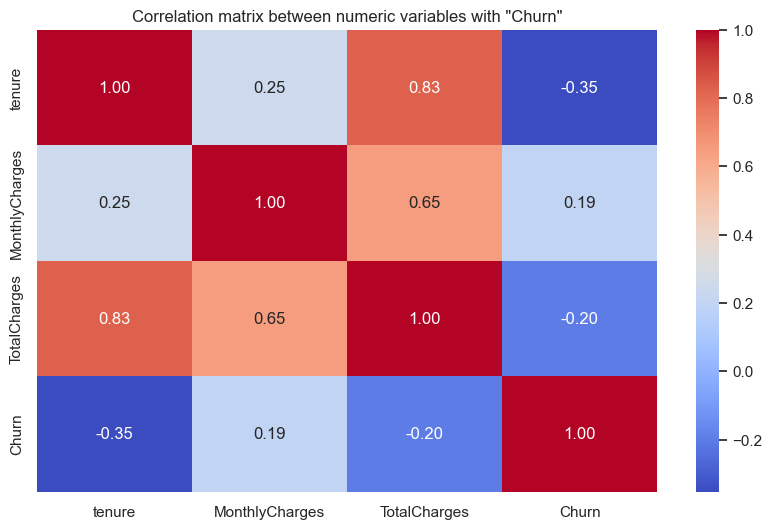

In [19]:
# Create a correlation heatmap
sns.heatmap(df_telco[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix between numeric variables with "Churn"')
plt.savefig('../reports/figures/eda/correlation_matrix_by_churn.png')
plt.show()

***Variable-by-variable interpretation of Churn***

``Tenure`` (time with the company):
* Correlation with Churn: -0.35

* Interpretation: The longer a customer stays with the company, the less likely they are to leave (negative churn). It has a moderate negative correlation.

``MonthlyCharges``
* Correlation with Churn: +0.19

* Interpretation: Customers who pay more monthly are slightly more likely to churn. This is a weak but positive correlation.

``TotalCharges`` (total accumulated charges)
* Correlation with Churn: -0.20

* Interpretation: Similar to tenure. If a customer has paid a lot (stayed a long time), they tend not to leave. Weak to moderate negative correlation.

<br>

***Relationships between categorical variables***

We analyze the distribution of the data again but this time based on our target label.

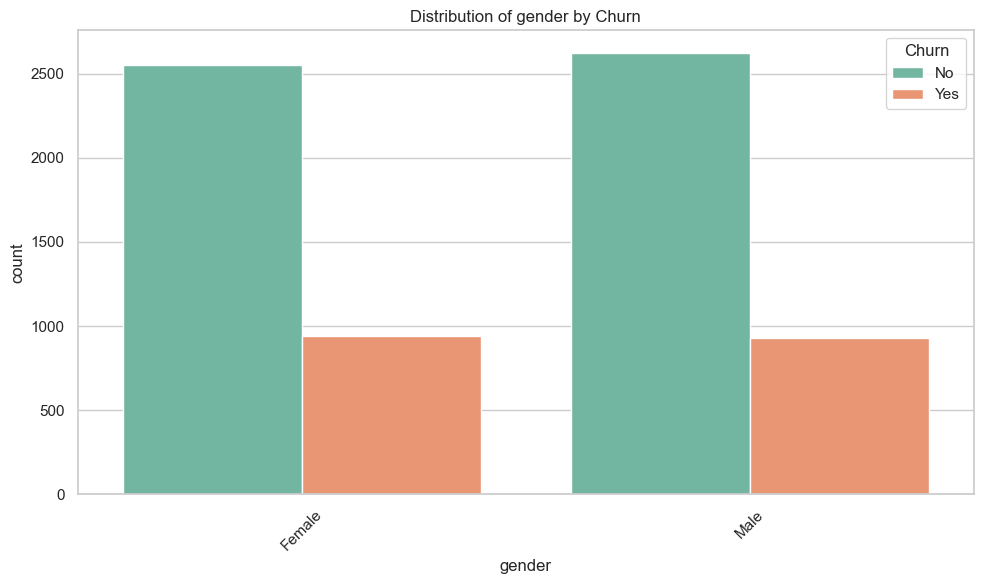

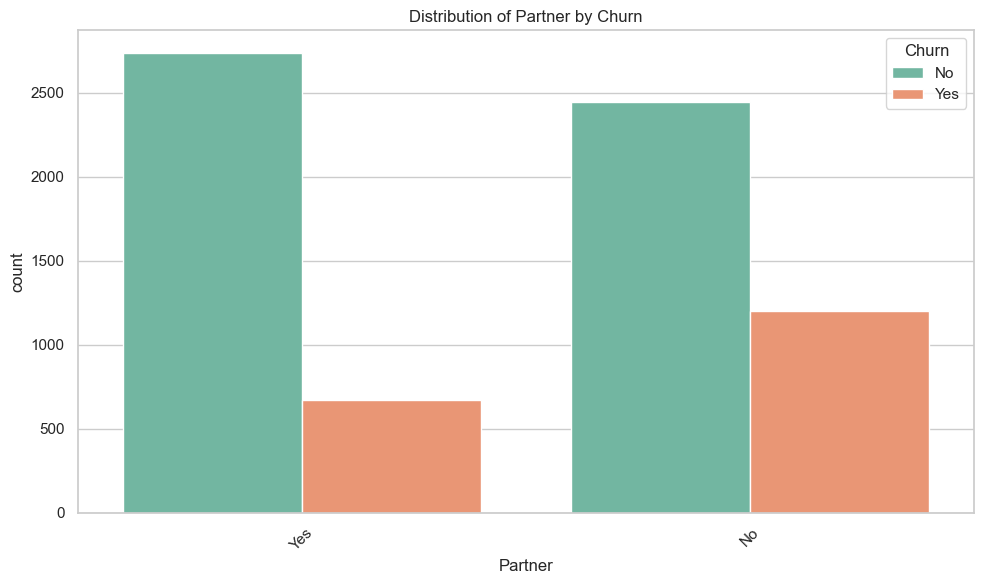

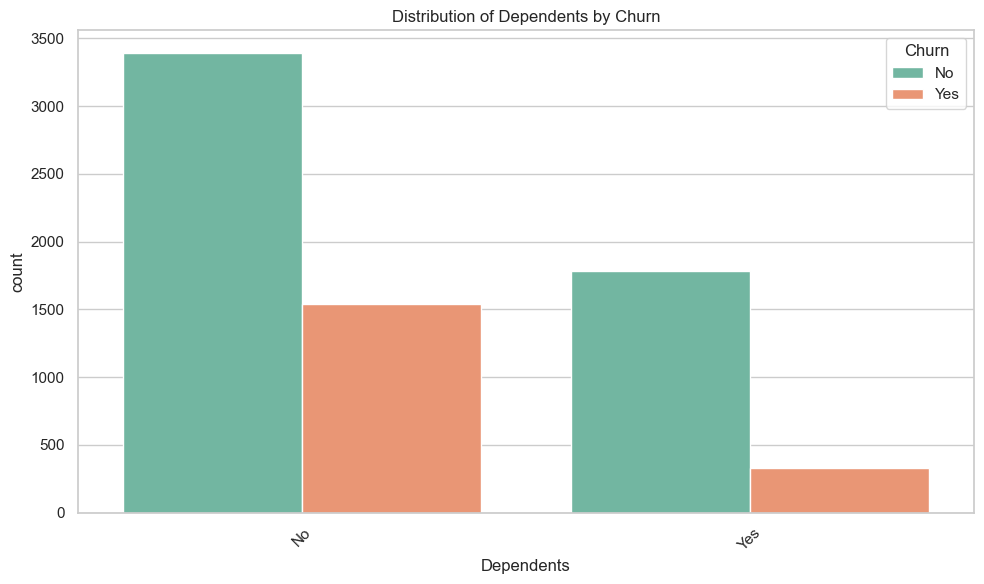

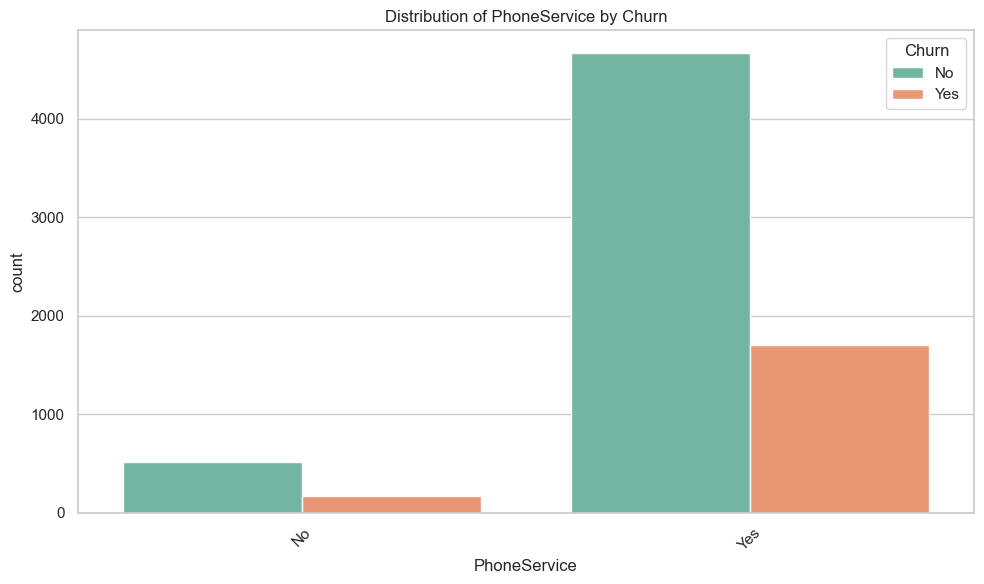

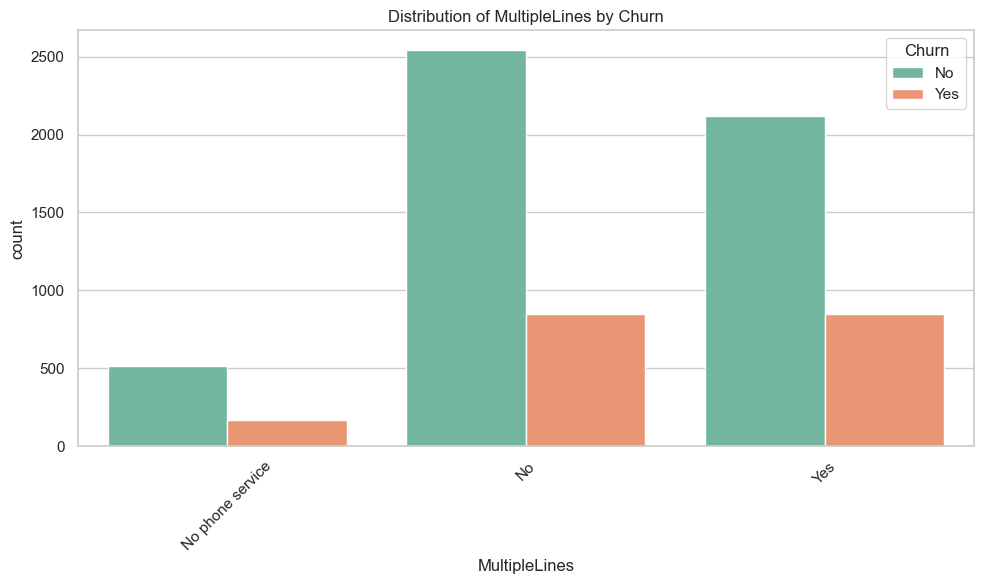

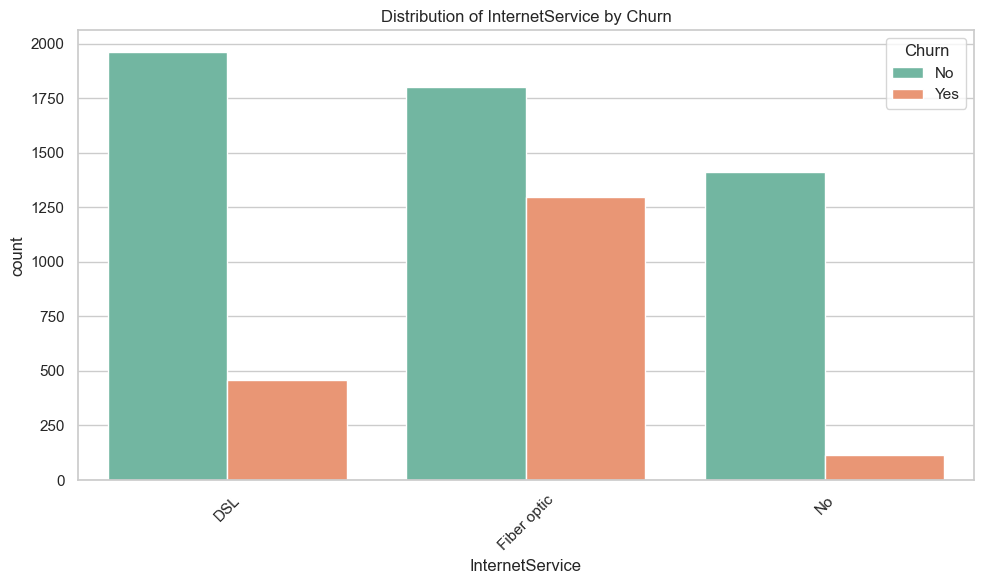

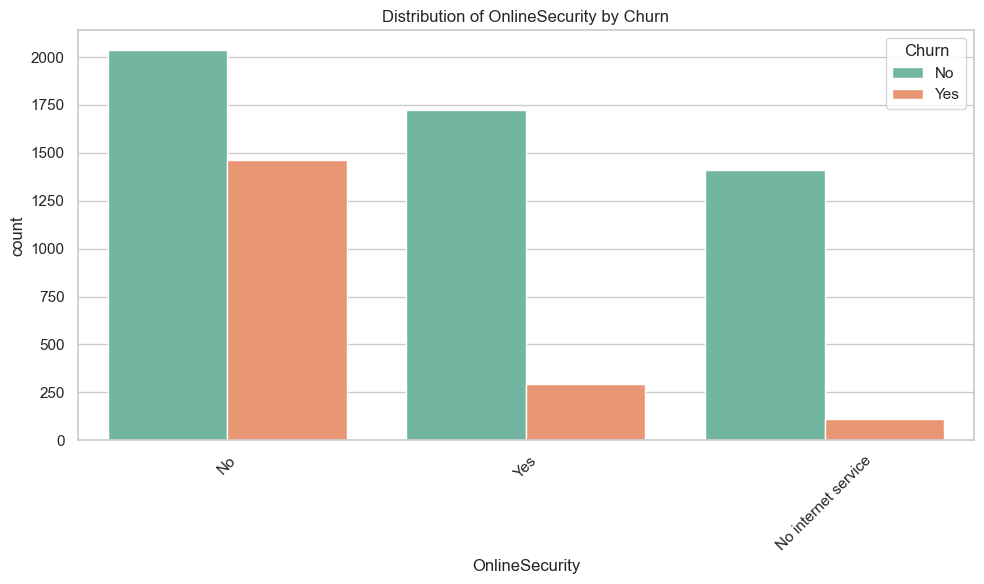

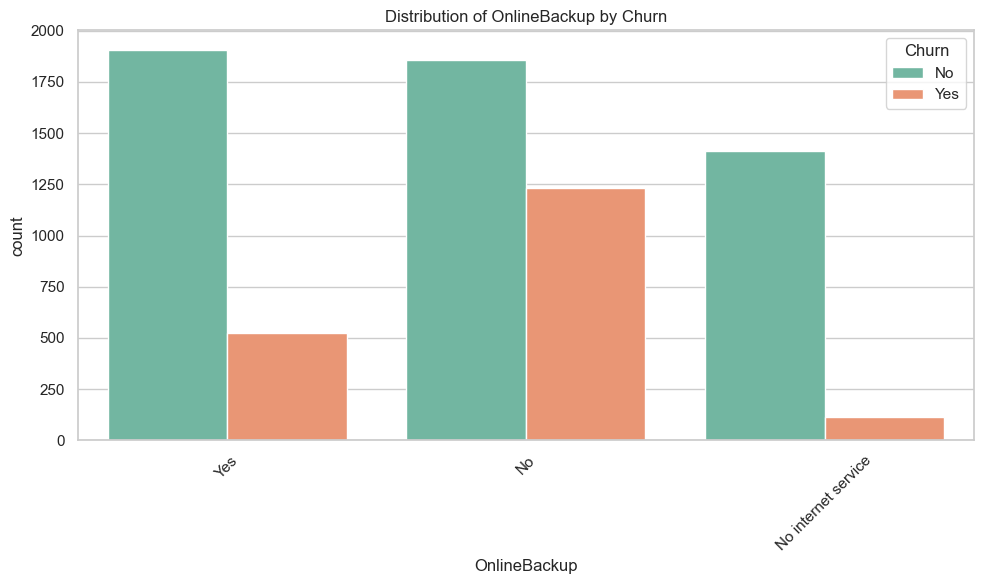

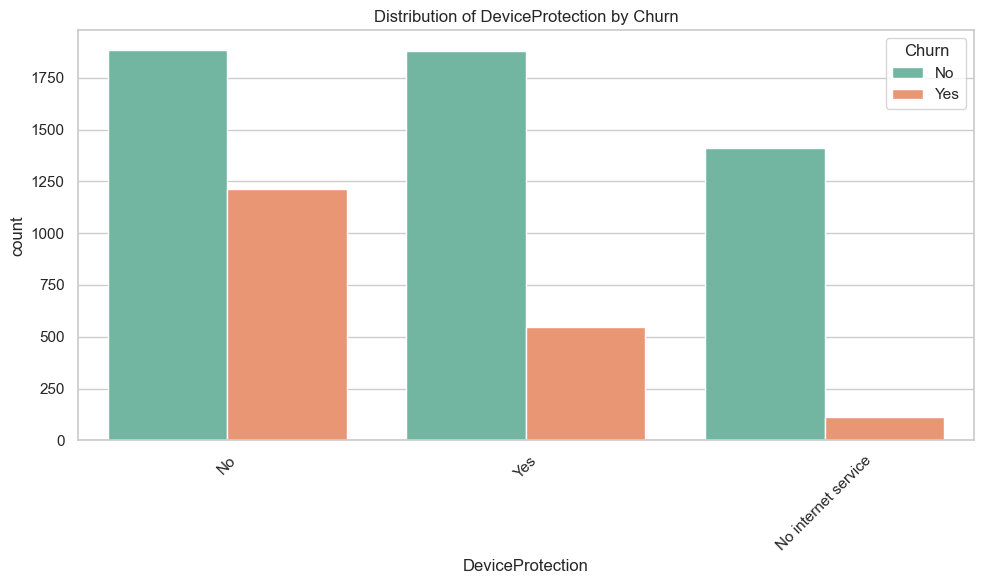

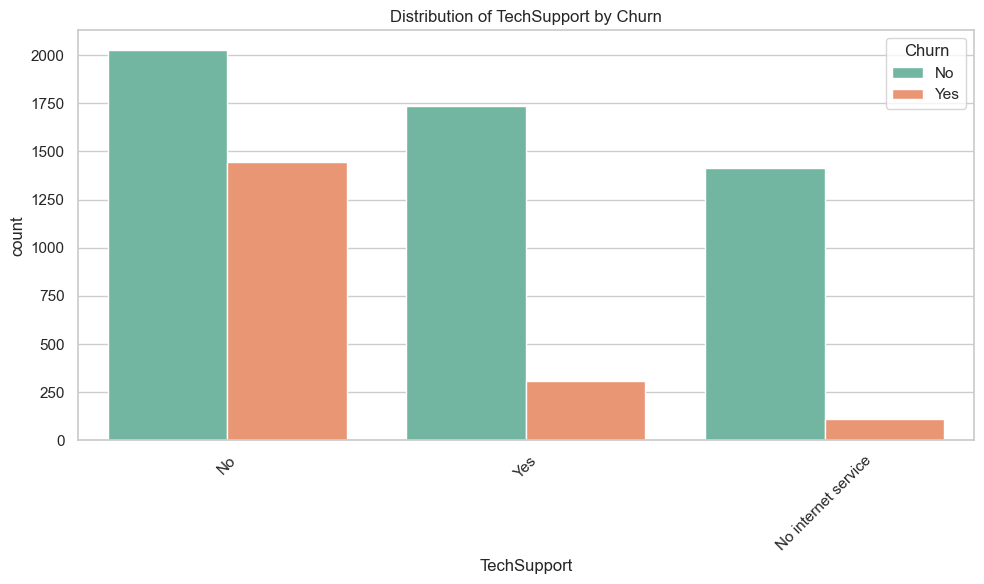

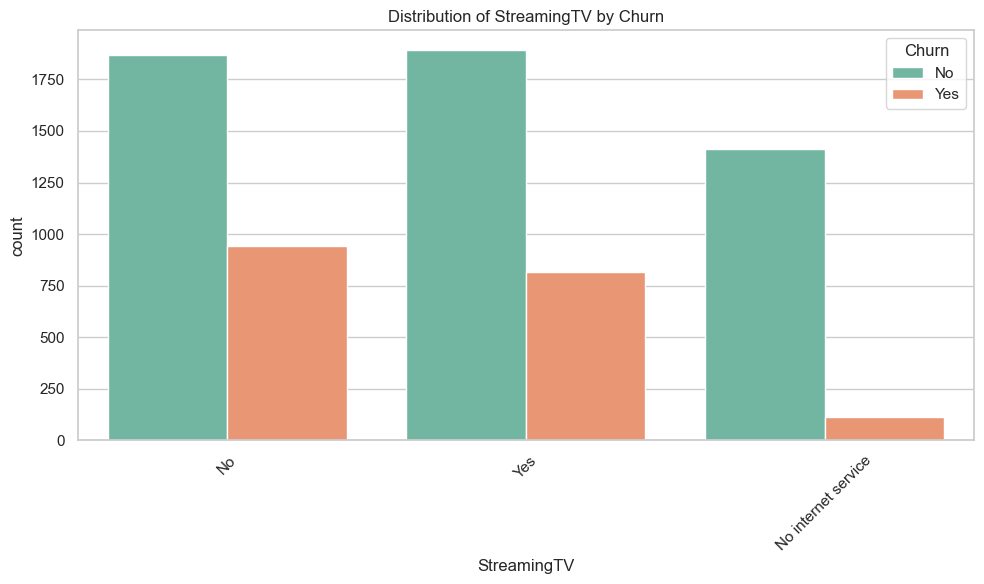

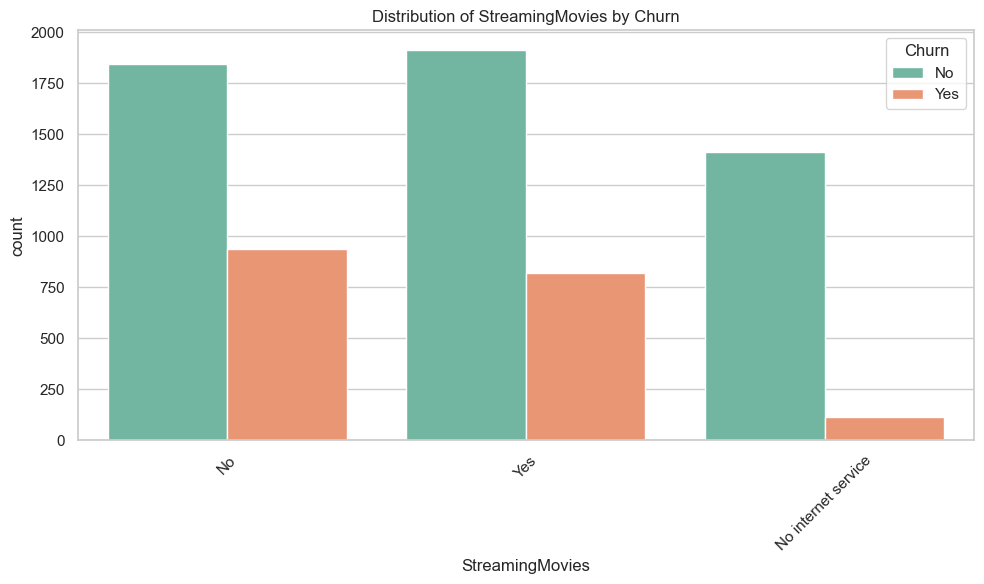

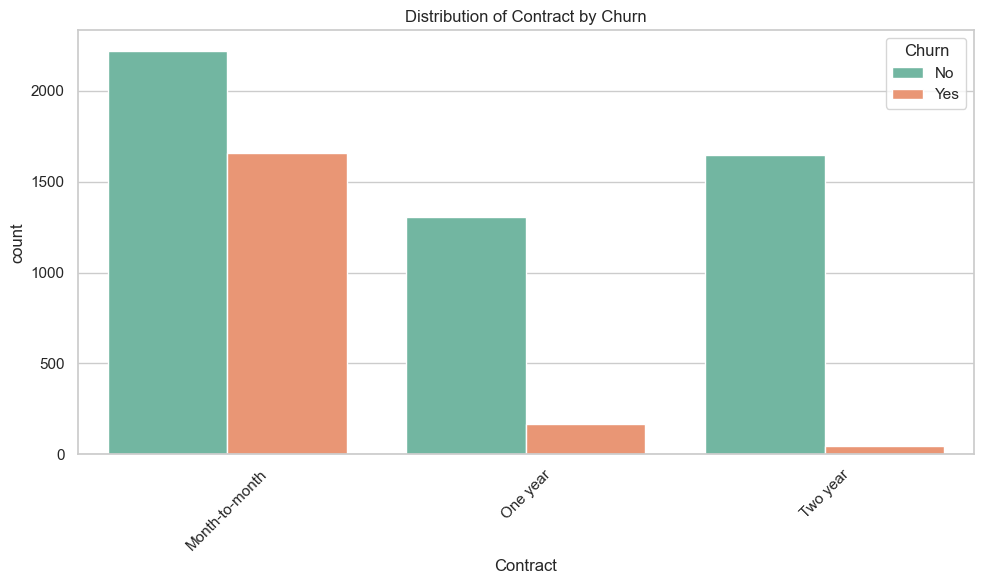

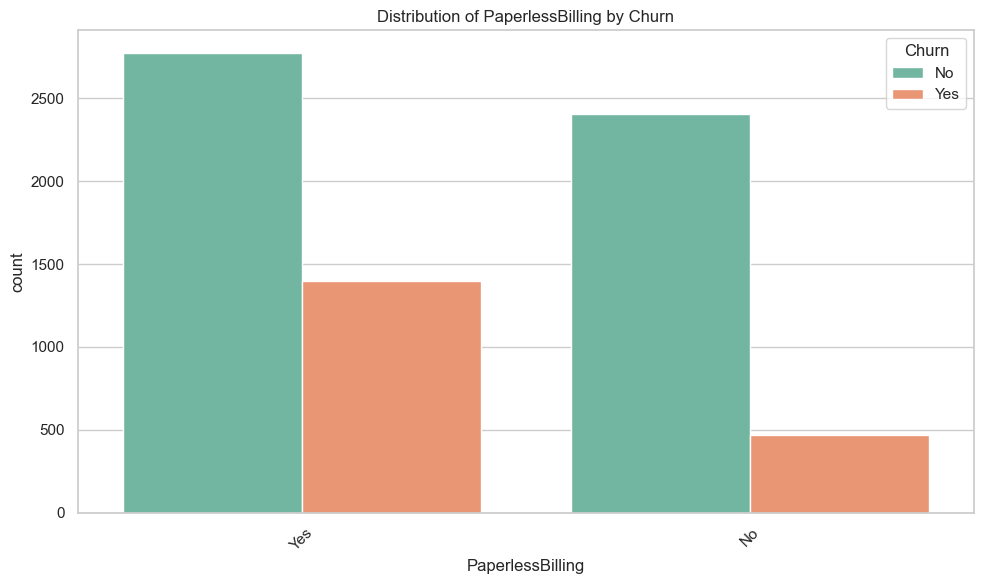

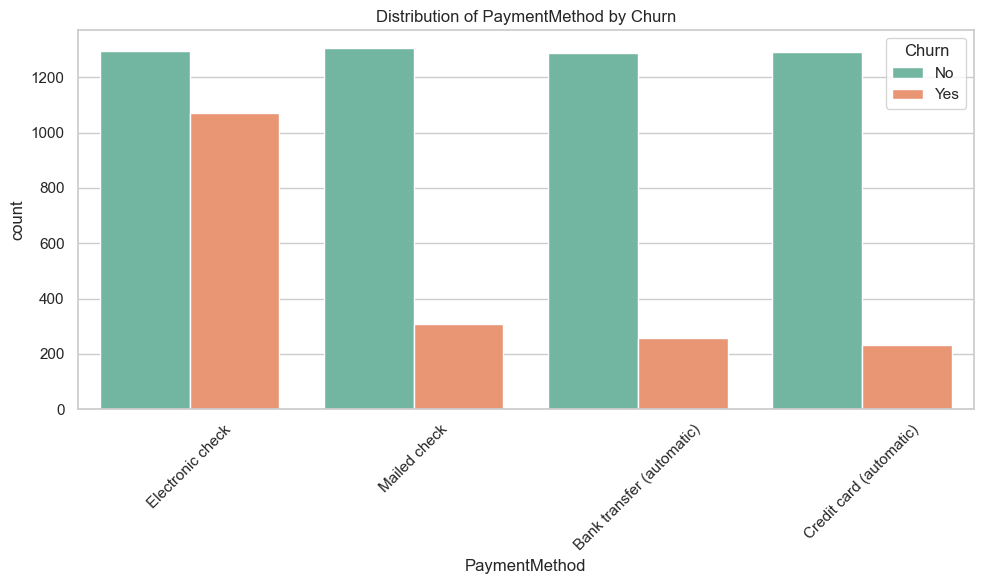

In [20]:
categorical_columns = [col for col in categorical_columns if col not in ['Churn']]

for col in categorical_columns:
    sns.countplot(data=df_telco, x=col, hue='Churn', palette='Set2')
    plt.title(f'Distribution of {col} by Churn')
    plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/eda/distribution_{col}_by_churn.png')
    plt.show()

Let's also look at the numerical distribution of the variables with respect to "Churn".

In [38]:
for col in categorical_columns:
    if col != 'Churn': # avoid comparing churn with itself
        ct = pd.crosstab(df_telco[col], df_telco['Churn'], normalize='index') # proportions
        print(f"Churn proportions for {col}:\n", ct, '\n')

Churn proportions for gender:
 Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603 

Churn proportions for Partner:
 Churn           0         1
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649 

Churn proportions for Dependents:
 Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502 

Churn proportions for PhoneService:
 Churn                0         1
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096 

Churn proportions for MultipleLines:
 Churn                    0         1
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099 

Churn proportions for InternetService:
 Churn                   0         1
InternetService                    
DSL              0.810409  0.189591
Fiber op

Now let's try to understand these relationships numerically. To do this, we begin by creating a contingency table for each possible combination of categories.

In [35]:
results = []

for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        if col1 == col2: continue
        table = pd.crosstab(df_telco[col1], df_telco[col2])
        chi2, p, dof, ex = chi2_contingency(table)
        results.append((col1, col2, p))

relations_df = pd.DataFrame(results, columns=['Var1', 'Var2', 'p-value'])
print("\nThe first 5 rows of our dataframe with the results for all categorical variables:\n")
print(relations_df.head())


The first 5 rows of our dataframe with the results for all categorical variables:

     Var1             Var2   p-value
0  gender          Partner  0.898234
1  gender       Dependents  0.391684
2  gender     PhoneService  0.614143
3  gender    MultipleLines  0.730088
4  gender  InternetService  0.636839


Now we calculate the square of all variables with respect to the objective, "Churn".

In [36]:
# Only regarding churn
for col in categorical_columns:
    table = pd.crosstab(df_telco[col], df_telco['Churn'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f'{col}: p-value = {p:.4f}')

gender: p-value = 0.4866
Partner: p-value = 0.0000
Dependents: p-value = 0.0000
PhoneService: p-value = 0.3388
MultipleLines: p-value = 0.0035
InternetService: p-value = 0.0000
OnlineSecurity: p-value = 0.0000
OnlineBackup: p-value = 0.0000
DeviceProtection: p-value = 0.0000
TechSupport: p-value = 0.0000
StreamingTV: p-value = 0.0000
StreamingMovies: p-value = 0.0000
Contract: p-value = 0.0000
PaperlessBilling: p-value = 0.0000
PaymentMethod: p-value = 0.0000


Let's see how strong these relationships are.

In [39]:
def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cramers_results = {}

for col in categorical_columns:
    conf_matrix = pd.crosstab(df_telco[col], df_telco['Churn'])
    cramers = cramers_v(conf_matrix)
    cramers_results[col] = cramers

print("\nCramér's V values for categorical variables with respect to 'Churn':")
for col, value in cramers_results.items():
    print(f"{col}: {value:.4f}")


Cramér's V values for categorical variables with respect to 'Churn':
gender: 0.0083
Partner: 0.1501
Dependents: 0.1639
PhoneService: 0.0114
MultipleLines: 0.0401
InternetService: 0.3225
OnlineSecurity: 0.3474
OnlineBackup: 0.2923
DeviceProtection: 0.2816
TechSupport: 0.3429
StreamingTV: 0.2305
StreamingMovies: 0.2310
Contract: 0.4101
PaperlessBilling: 0.1915
PaymentMethod: 0.3034


### Results

1. **Variables with a strong association with churn (``p < 0.05`` and ``Cramér's V > 0.3``)**

    * ``Contract``: showed a strong relationship with churn. Customers with month-to-month contracts had significantly higher churn rates.

    * ``TenureGroup`` (grouped time with the company): strong correlation with churn, reinforcing the idea that newer customers tend to churn more.

    * ``PaperlessBilling``: also significantly associated, suggesting that those who use digital billing may be more prone to churn.

    * ``InternetService`` and its derivatives (``OnlineSecurity``, ``StreamingTV``, etc.) showed a clear association, although with varying strength.

2. **Variables with a weak or non-significant association**:

   * ``Gender``: did not show a statistically significant relationship with churn (p > 0.05).

   * ``PhoneService``: also did not show a clear association.

   * ``MultipleLines`` and ``Partner``: showed weak relationships according to Cramér’s V (< 0.1), despite having low p-values ​​in some cases.

With this, we can also detect strong internal relationships between variables that share a hierarchy or dependency, such as:
``InternetService`` and ``StreamingTV``, ``OnlineSecurity``, ``TechSupport``, ``PaymentMethod``, and ``PaperlessBilling``.

These findings will guide the selection of variables in the predictive modeling process, prioritizing those with the greatest evidence of informative value.

<br>

<hr>

## Author

<a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/">**Flavio Aguirre**</a>
<br>
<a href="https://coursera.org/share/e27ae5af81b56f99a2aa85289b7cdd04">***Data Scientist***</a>